In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [48]:
df = pd.read_csv('..\Initial_data\K5PCV5\K5PCV5_cor.csv', ";")
df

C:\Users\User\AppData\Local\Temp\ipykernel_9316\4902891.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5PCV5\K5PCV5_cor.csv', ";")


,K5PC5CH.OP,K5PCV5I.PV,K5T4.PV,K5P21.PV,K5T18_2.PV,K5T7.PV,K5P19_2.PV,K5P19_1.PV,K5PC6CH.OP,K5HCV63I.PV,...,K5P18_2.PV,K5P23.PV,K5P24.PV,K5P20.PV,K5T5_1.PV,K5T5_2.PV,K5T18_1.PV,K5T8_4.PV,K5T8_5.PV,K5T8_6.PV
0,28.43256,96.80196,107.4449,-274.5025,76.77946,41.84182,-274.6382,-322.5910,41.48160,97.29976,...,-70.41599,0.554497,0.623450,-831.0353,567.9844,657.2806,203.5855,93.15239,97.01862,140.6675
1,37.02330,96.78888,116.0183,-355.9825,81.91438,41.49650,-253.3734,-306.2327,49.20881,97.32501,...,-75.83286,0.803466,0.894443,-793.8561,587.1810,694.4102,219.8285,97.42670,102.68660,148.8049
2,40.27494,96.86331,120.4990,-383.8112,84.44536,42.03291,-247.2132,-301.2046,52.11905,97.40008,...,-77.27142,0.891745,0.993353,-781.3564,591.4104,705.2923,227.0702,100.82560,106.75240,155.0162
3,33.39332,96.85043,111.9130,-314.1233,79.10992,40.66955,-264.0493,-313.9809,45.67082,97.36178,...,-73.86970,0.676204,0.758241,-812.5995,579.0649,677.1272,213.1518,95.36046,99.94947,145.7436
4,31.39035,96.77234,109.0870,-302.5283,78.44747,37.86535,-265.3562,-314.7856,44.23922,96.98950,...,-73.61724,0.645111,0.715498,-818.5420,574.5350,669.7603,211.3369,92.83288,97.44041,143.6423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,33.25313,96.28430,117.2377,-306.5566,80.47744,44.77445,-265.8409,-314.6771,45.77393,96.94262,...,-72.98355,0.678377,0.764011,-813.6609,578.9767,678.8871,217.1490,99.48669,103.83820,149.5026
125,32.90705,96.27695,117.2050,-302.6340,80.10125,45.29783,-267.7749,-316.0378,45.42057,97.09579,...,-72.32182,0.666750,0.753789,-815.4399,576.3058,674.6070,217.0010,99.87650,104.13790,149.6594
126,31.83300,96.27595,114.7550,-296.5641,76.20879,43.63995,-268.8632,-316.9579,44.49977,96.86402,...,-71.86654,0.644950,0.729902,-818.3569,572.5627,667.1817,214.9969,98.01228,102.26290,147.6954
127,30.21828,96.23937,112.3144,-287.9799,71.99249,42.38327,-269.9579,-318.3916,43.29536,96.46970,...,-71.22888,0.618028,0.697992,-822.6872,570.9168,664.0824,212.6010,96.11859,100.42390,145.8230


<AxesSubplot:>

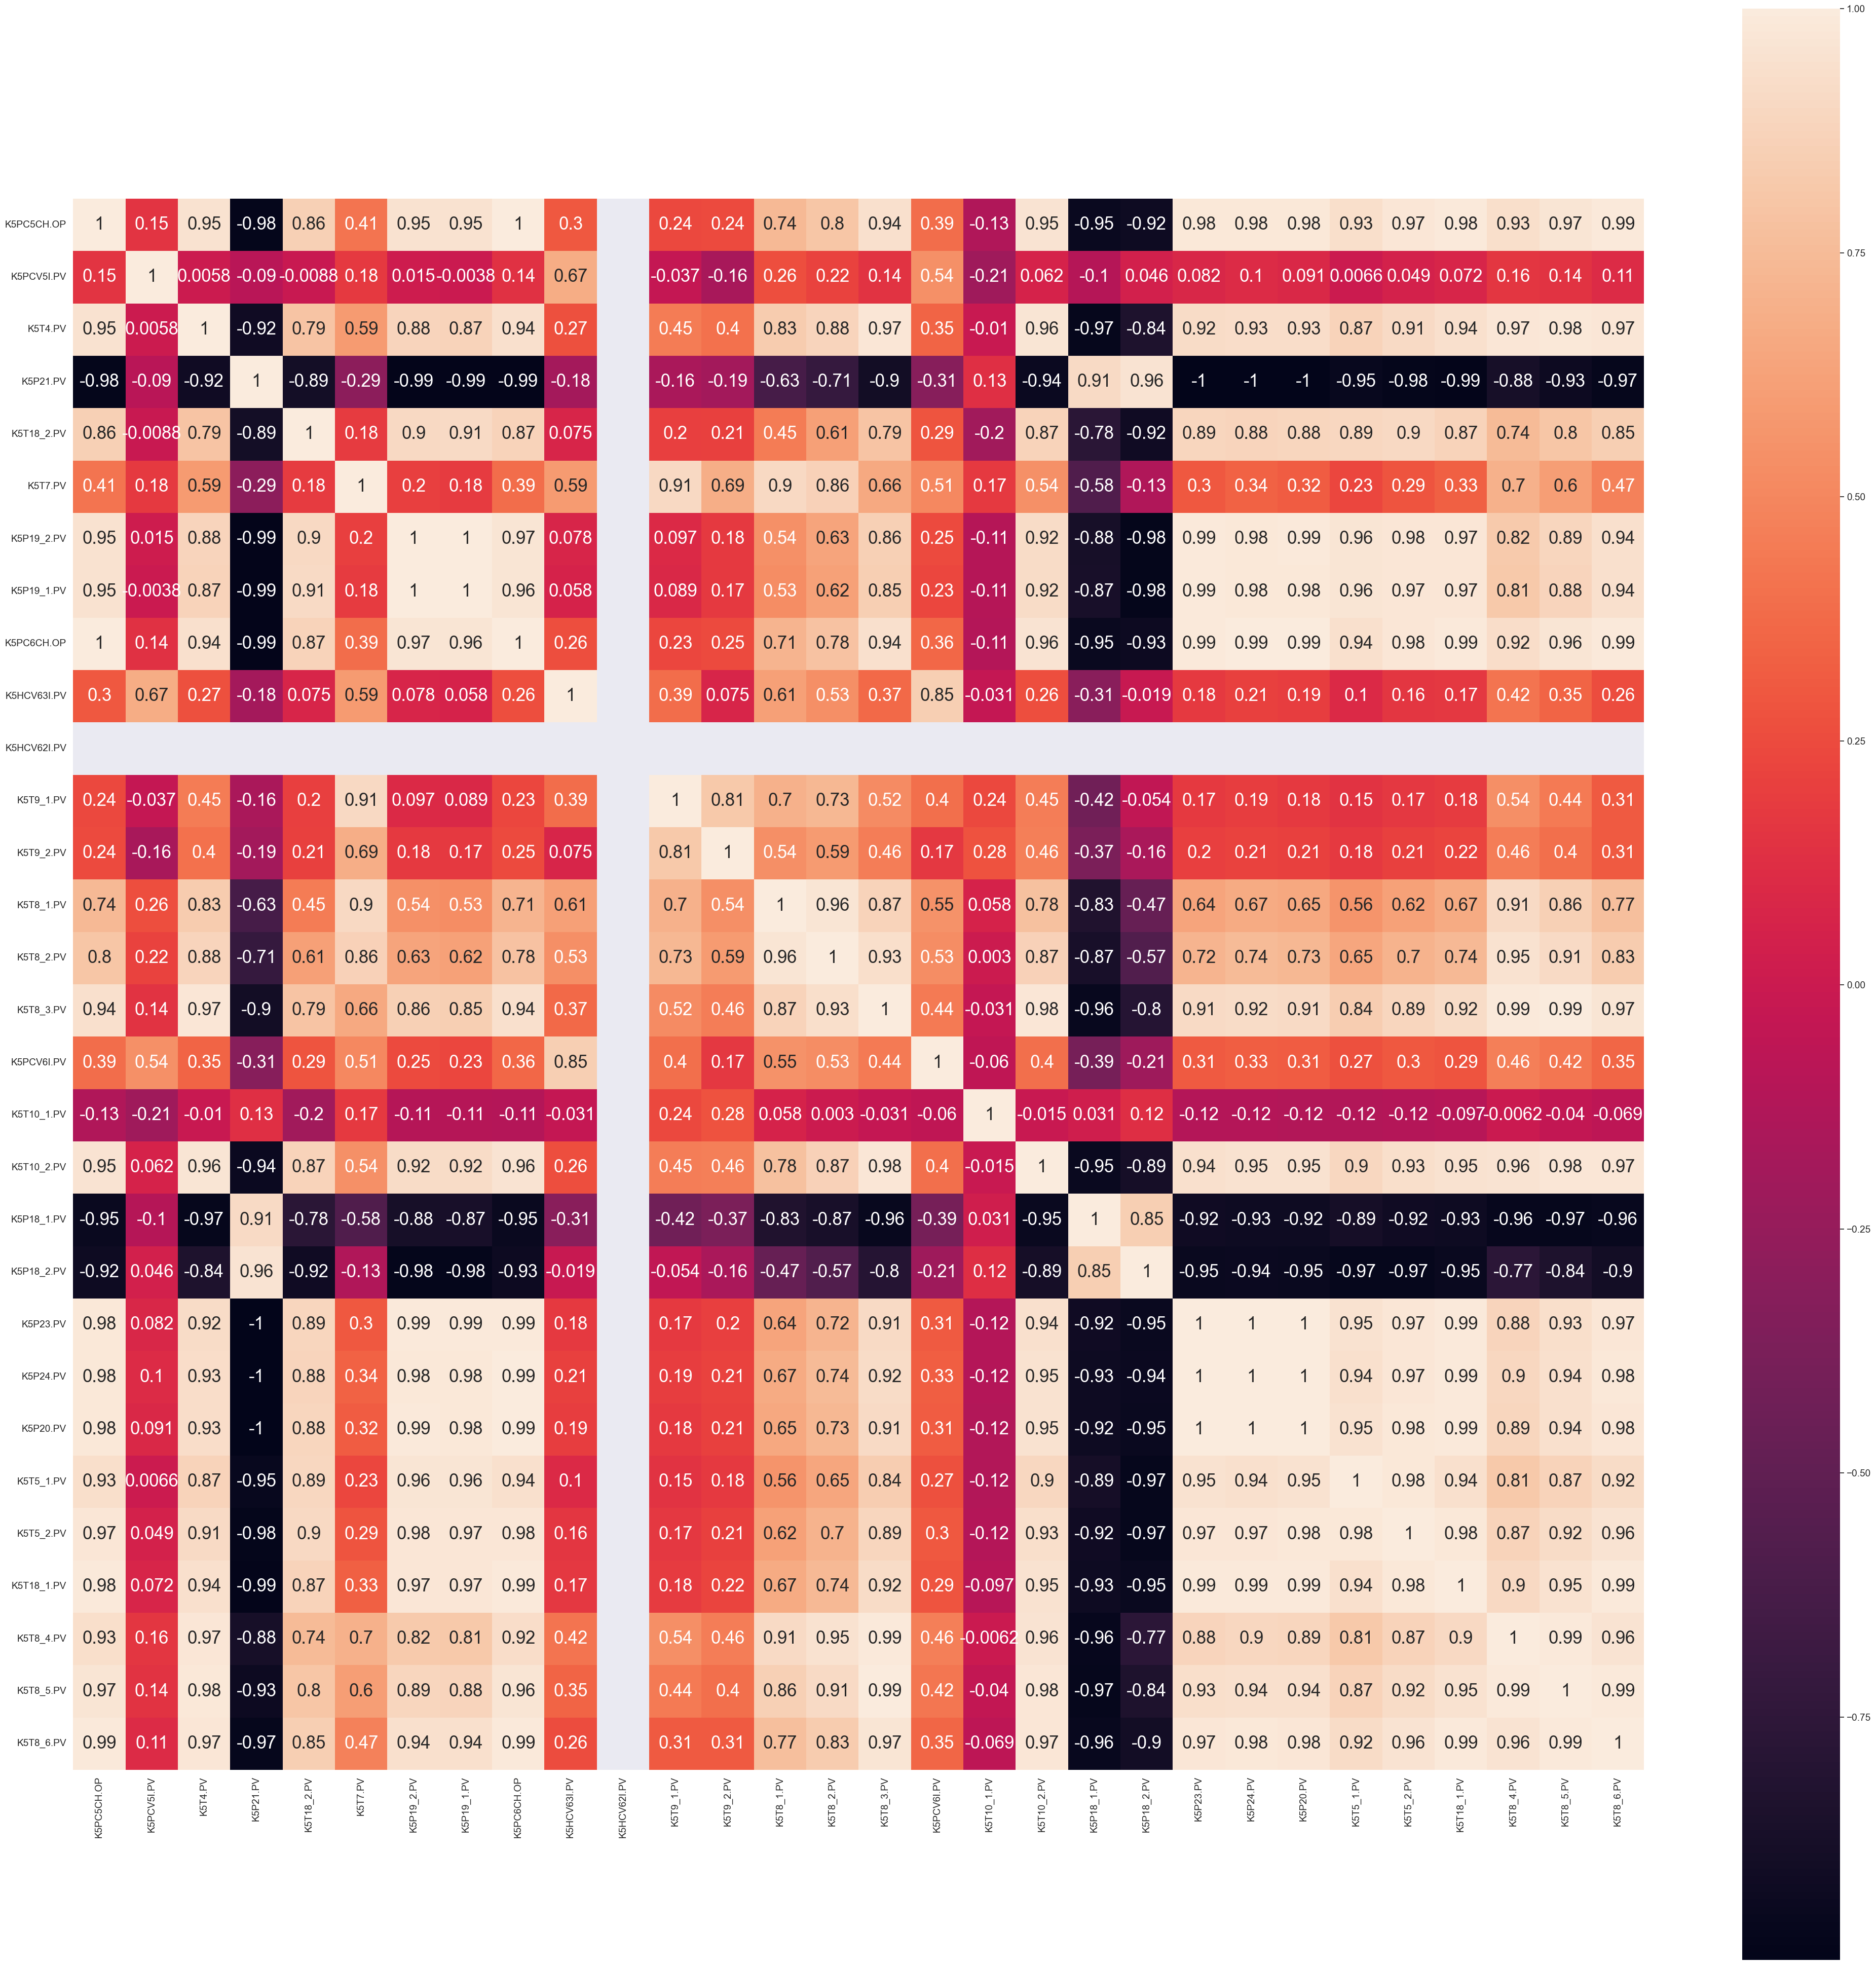

In [49]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [54]:
df = pd.read_csv('..\Initial_data\K5PCV5\K5PCV5.csv', ";")
df

C:\Users\User\AppData\Local\Temp\ipykernel_9316\3756968986.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5PCV5\K5PCV5.csv', ";")


,K5PC5CH.OP,K5PCV5I.PV
0,53.25539,96.82864
1,53.06498,96.77106
2,52.99632,96.77605
3,52.43256,96.24587
4,50.47416,95.58419
...,...,...
124,25.49537,95.87923
125,25.27147,95.76997
126,25.25122,96.61850
127,24.47862,96.46205


In [55]:
df=df.dropna()
df=df.round(5)
df=df.drop_duplicates(["K5PC5CH.OP"])
df=df.drop_duplicates(["K5PCV5I.PV"])
df

,K5PC5CH.OP,K5PCV5I.PV
0,53.25539,96.82864
1,53.06498,96.77106
2,52.99632,96.77605
3,52.43256,96.24587
4,50.47416,95.58419
...,...,...
124,25.49537,95.87923
125,25.27147,95.76997
126,25.25122,96.61850
127,24.47862,96.46205


In [59]:
y = df.drop(['K5PC5CH.OP'], axis=1)
x = df.drop(['K5PCV5I.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)
task = np.linspace(20, 60, 100)[:, np.newaxis]

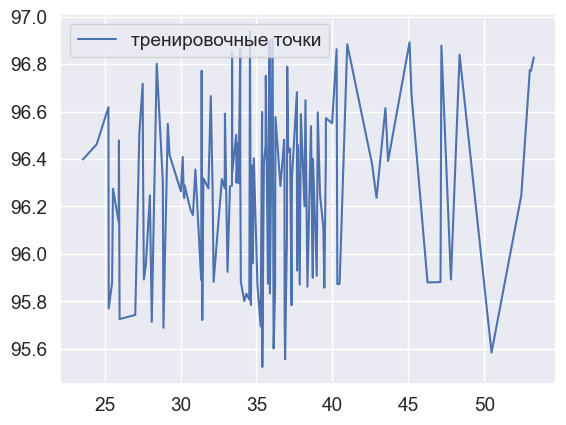

In [60]:
plt.plot(x, y, label = 'тренировочные точки') 
plt.legend(loc='upper left') 
plt.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


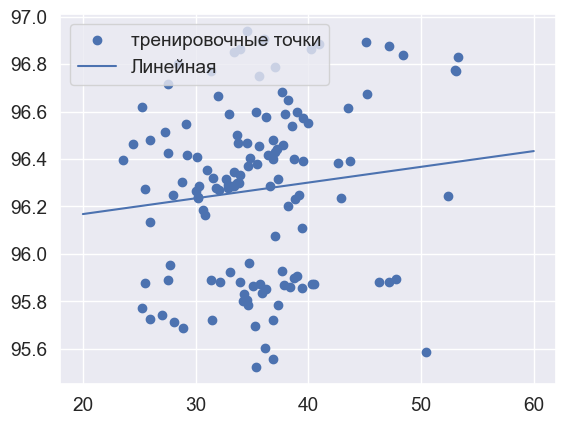

0.07158409449719982

In [61]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X_train, y_train) # Обучим линейную регрессию
F5 = lr.predict(task) # Предсказываем y для линейной регрессии
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, F5, label = 'Линейная') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(lr, X_test, y_test, cv=2)
lr.score(X_test, y_test)

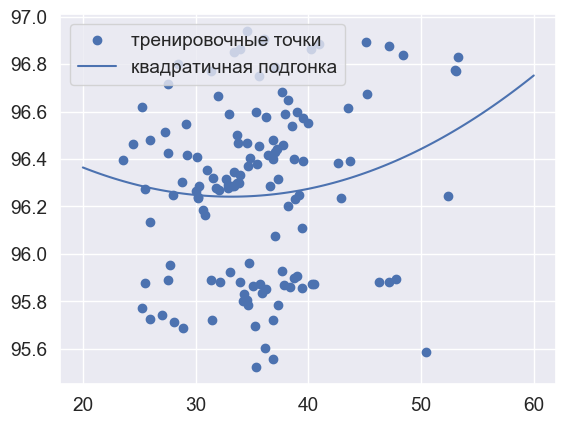

array([-0.56530762, -0.07826759])

In [62]:
pr = LinearRegression() # Линейная регрессия
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train)       # Преобразуем данные
pr.fit(X_quad, y_train) # Обучаем полиномиальную регрессию
y_pr = pr.predict(quadratic.fit_transform(task)) # Предсказываем y для полиномиальной регрессии

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr, X_test, y_test, cv=2)

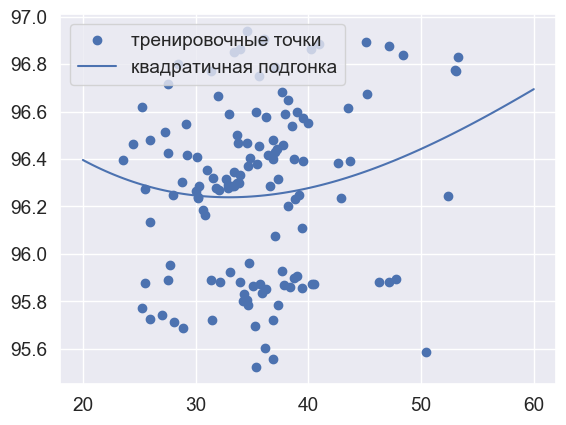

array([-0.56530762, -0.07826759])

In [63]:
pr_3 = LinearRegression()
cube = PolynomialFeatures(degree=3)
X_cub = cube.fit_transform(X_train)   
pr_3.fit(X_cub, y_train)
y_pr = pr_3.predict(cube.fit_transform(task))
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_3, X_test, y_test, cv=2)

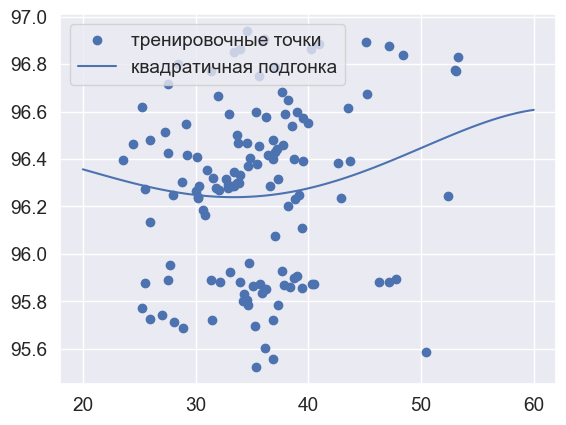

array([-0.56530762, -0.07826759])

In [64]:
pr_4 = LinearRegression()
Fig = PolynomialFeatures(degree=4)
X_15 = Fig.fit_transform(X_train)   
pr_4.fit(X_15, y_train)
y_pr_4 = pr_4.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_4, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_4, X_test, y_test, cv=2)

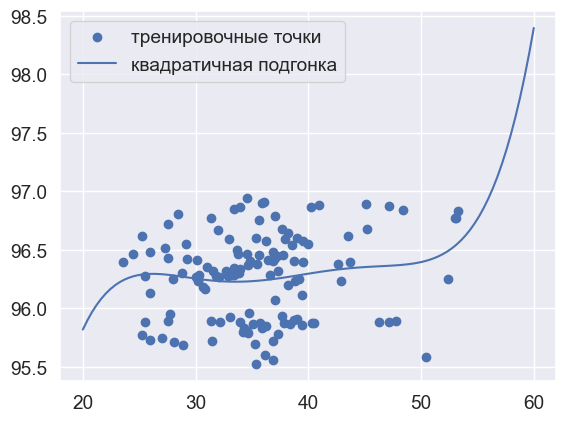

array([-0.56530762, -0.07826759])

In [67]:
pr_5 = LinearRegression()
Fig = PolynomialFeatures(degree=5)
X_5 = Fig.fit_transform(X_train)   
pr_5.fit(X_5, y_train)
y_pr_5 = pr_5.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_5, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_5, X_test, y_test, cv=2)

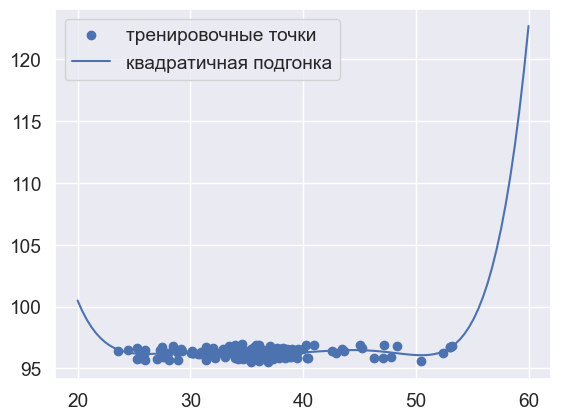

array([-0.56530762, -0.07826759])

In [68]:
pr_6 = LinearRegression()
Fig = PolynomialFeatures(degree=6)
X_6 = Fig.fit_transform(X_train)   
pr_6.fit(X_6, y_train)
y_pr_6 = pr_6.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_6, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_6, X_test, y_test, cv=2)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


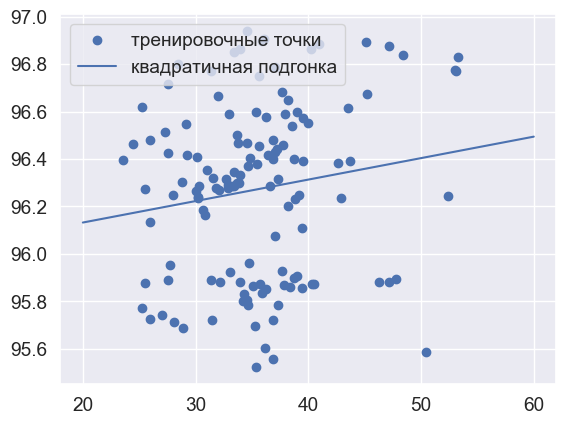

0.0893281706525959

In [69]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(x, y)
y_pr=clf.predict(task)
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
clf.score(X_test, y_test)

In [70]:
import pickle
filename = '../model/K5PCV5.sav'
pickle.dump(clf, open(filename, 'wb'))

In [71]:
loaded_model = pickle.load(open("../model/K5PCV5.sav", 'rb'))

In [72]:
task2 = {'K5PC5CH.OP':[26.31]}
df2 = pd.DataFrame(data=task2)
df2

,K5PC5CH.OP
0,26.31


In [73]:
loaded_model.predict(df2)

array([[96.1893424]])